In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.graphics.tsaplots as tsa
import statsmodels.stats.diagnostic as diag

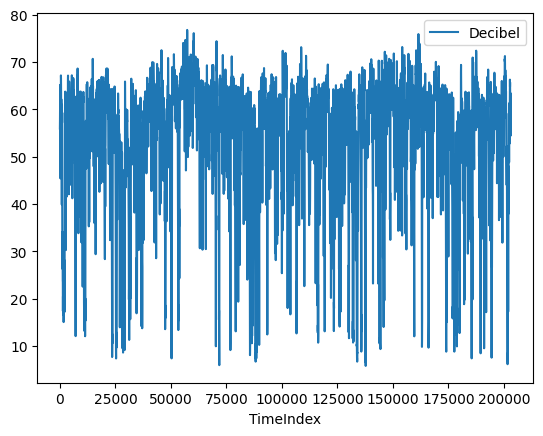

In [2]:
# Load dataset
df = pd.read_csv('datasets/restaurant_decibel_level.csv', header=0, index_col=[0])
df.plot()
plt.show()

# Autocorrelation Plot Test 

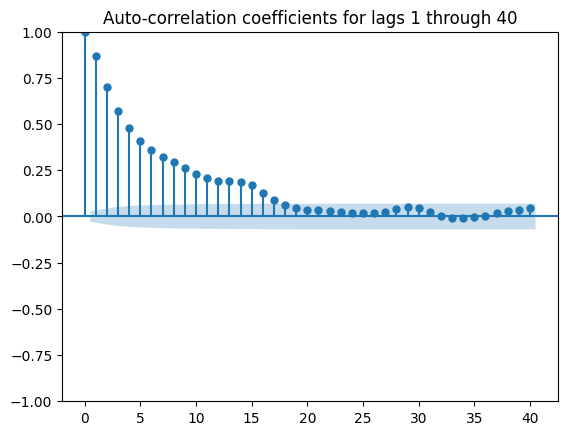

In [3]:
# acf plot for 40 lags and confidence level 95%
tsa.plot_acf(df['Decibel'], lags=40, alpha=0.05, title='Auto-correlation coefficients for lags 1 through 40')
plt.show()

The alpha=0.05 tells statsmodels to also plot the 95% confidence interval region. 

As we can see, the time series contains significant auto-correlations up through lags 17. Incidentally, the auto-correlation at lag 0 is always 1.0 as a value is always perfectly correlated with itself.

# Ljung-Box test

In [4]:
# Ljung Box test
diag.acorr_ljungbox(df['Decibel'], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)

(array([13172.80554476]), array([0.]), array([13156.42074648]), array([0.]))

The value 13172.80554476 is the value of the test statistic for the Ljung-Box test and 0.0 is its p-value as per the Chi-square(k=40) table.

The value 13156.42074648 is the test statistic of the Box-Pierce test and 0.0 is its p-value as per the Chi-square(k=40) tables.

As we can see, both p-values are less than 0.01 and so we can say with 99% confidence that the restaurant decibel level time series is not pure white noise.

# Detecting Random Walks

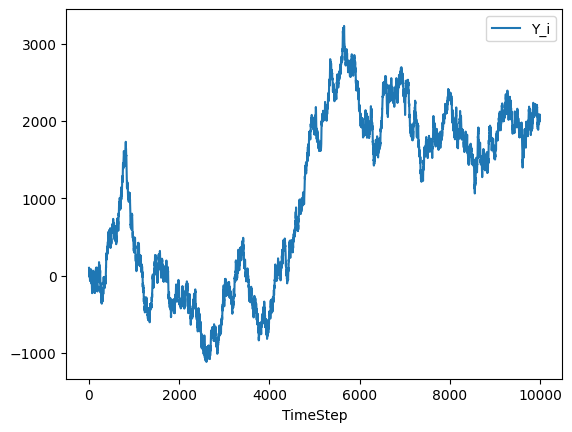

In [5]:
# Load Dataset
df = pd.read_csv('datasets/random_walk.csv', header=0, index_col=[0])
df.plot()
plt.show()

Random walks are often highly correlated. In fact, they are auto-correlated white noise!
<p>The white noise detection tests presented above will latch on these auto-correlations, causing them to conclude that the time series is not white noise.</p>

(array([393833.91252517]), array([0.]), array([392952.07675659]), array([0.]))

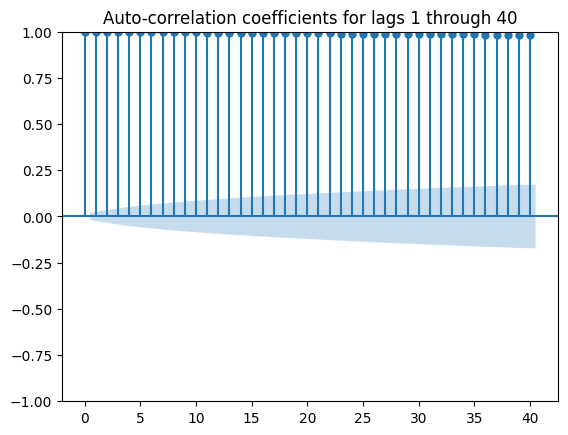

In [6]:
# acf plot for 40 lags and confidence level 95%
tsa.plot_acf(df['Y_i'], lags=40, alpha=0.05, title='Auto-correlation coefficients for lags 1 through 40')
# Ljung Box test
diag.acorr_ljungbox(df['Y_i'], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)

The p value of 0.0 indicates that we must strongly reject the null hypothesis that the data is white noise. Both Ljung-Box and Box-Pierce tests think that this data set has not been generated by a pure random process.

Also, acf plot suggest that the time series contains significant auto-correlations up through lags 40.

This is obviously a false result.

<h3> If the original time series is a random walk, its first difference is pure white noise. </h3>

Let’s see if things change after we take the first difference of the data, i.e. we create a new data set with Y = Y_i —Y_(i-1) :

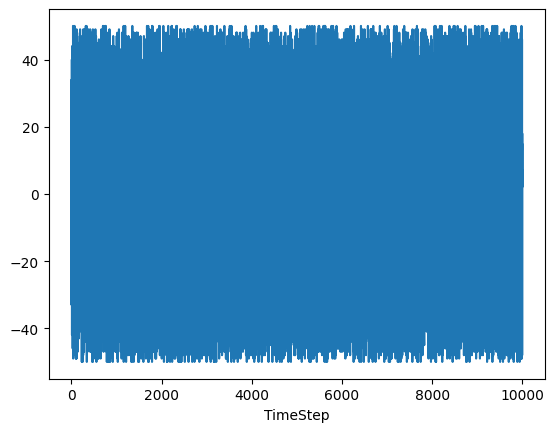

In [7]:
diff_Y_i = df['Y_i'].diff()
#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()
 
#Let’s plot the diff-ed data set
diff_Y_i.plot()
plt.show()

(array([32.93405364]),
 array([0.77822417]),
 array([32.85051846]),
 array([0.78137548]))

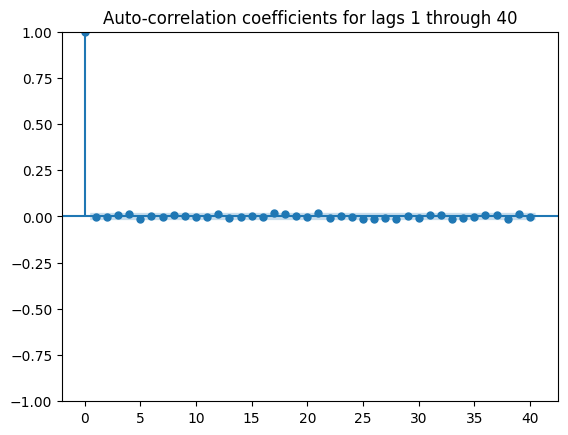

In [8]:
# acf plot for 40 lags and confidence level 95%
tsa.plot_acf(diff_Y_i, lags=40, alpha=0.05, title='Auto-correlation coefficients for lags 1 through 40')
# Ljung Box test
diag.acorr_ljungbox(diff_Y_i, lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)

Notice that this time the test statistic’s value 32.934 reported by Ljung-Box, and 32.850 reported by Box-Pierce tests is much smaller. And the corresponding p-values detected on the Chi-square(k=40) tables are 0.778 and 0.781 respectively, which are well above 0.05. This is easily enough to support the null hypothesis that the data (i.e. the differenced time series) is pure white noise.

Also from acf plot, we can see no lags are significant, so it is pure white noise. 

# Summary

1. Testing for white noise is one of the first things that a data scientist should do so as to avoid spending time on fitting models on data sets that offer no meaningfully extract-able information.
2. If a data set is not white noise, then after fitting a model to the data, one should run a white noise test on the residual errors to get a sense for how much information the model has been able to extract from the data.
3. For time series data, auto-correlation plots and the Ljung-Box test offer two useful techniques for determining if the time series is in reality, just white noise.
